In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate

In [107]:
#Step 1 : load the dataset
final=pd.read_csv(r"/content/drive/MyDrive/Heart_disease_cleveland_new.csv")


In [108]:
#To find First five rows of dataframe"
print(final.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [109]:
final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [110]:
#to check size of data-number of column and rows.
final.shape

(303, 14)

In [111]:
#To print informations about the dataframe.
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
# To remove duplicates
final.drop_duplicates(inplace=True)


In [113]:
#To get statistical overview of data
final.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [114]:
# To print data types
print(final.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [115]:
#To discover the number of missing values in the dataset
print(final.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [116]:
final.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [117]:
final.describe(include=['float64'])

,oldpeak
count,303.000000
mean,1.039604
std,1.161075
min,0.000000
25%,0.000000
50%,0.800000
75%,1.600000
max,6.200000


In [118]:

#Define the numerical continous data
num_continous_features=['age','trestbps','chol','thalach','oldpeak']

#Identify the attributes that need to be converted into object data type
convert_features=[feature for feature in final.columns if feature not in num_continous_features]

#Convert the identified attributes to object data type
final[convert_features]=final[convert_features].astype('object')

final.dtypes


,0
age,int64
sex,object
cp,object
trestbps,int64
chol,int64
fbs,object
restecg,object
thalach,int64
exang,object
oldpeak,float64


In [119]:
#display summary of statistic and transposes it
final.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [120]:
#display summary of non-numeric columns in the dataset
final.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,4,3,2
top,1,3,0,0,0,0,0,1,0
freq,206,144,258,151,204,142,180,168,164


EXPLORATORY DATA ANALYSIS (EDA)

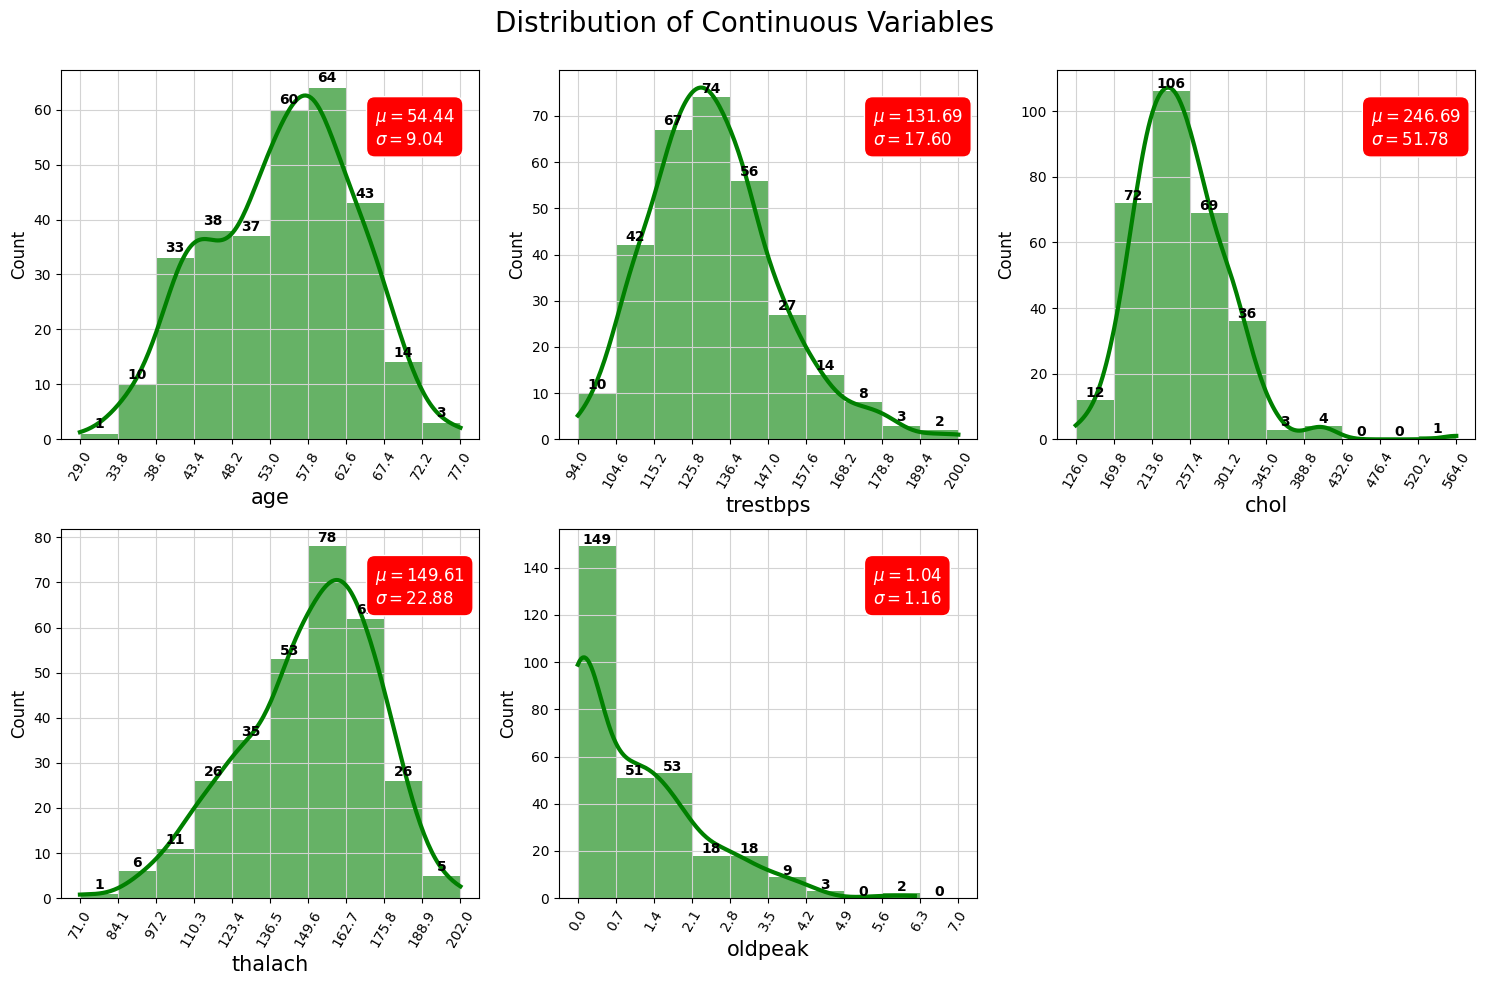

In [121]:
final_continuous = final[num_continous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(final_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(final_continuous[col],
                                     range=(np.floor(final_continuous[col].min()), np.ceil(final_continuous[col].max())))

    graph = sns.histplot(data=final_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='green', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=60)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    #mean and std
    textstr = '\n'.join((
        r'$\mu=%.2f$' % final_continuous[col].mean(),
        r'$\sigma=%.2f$' % final_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='red', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

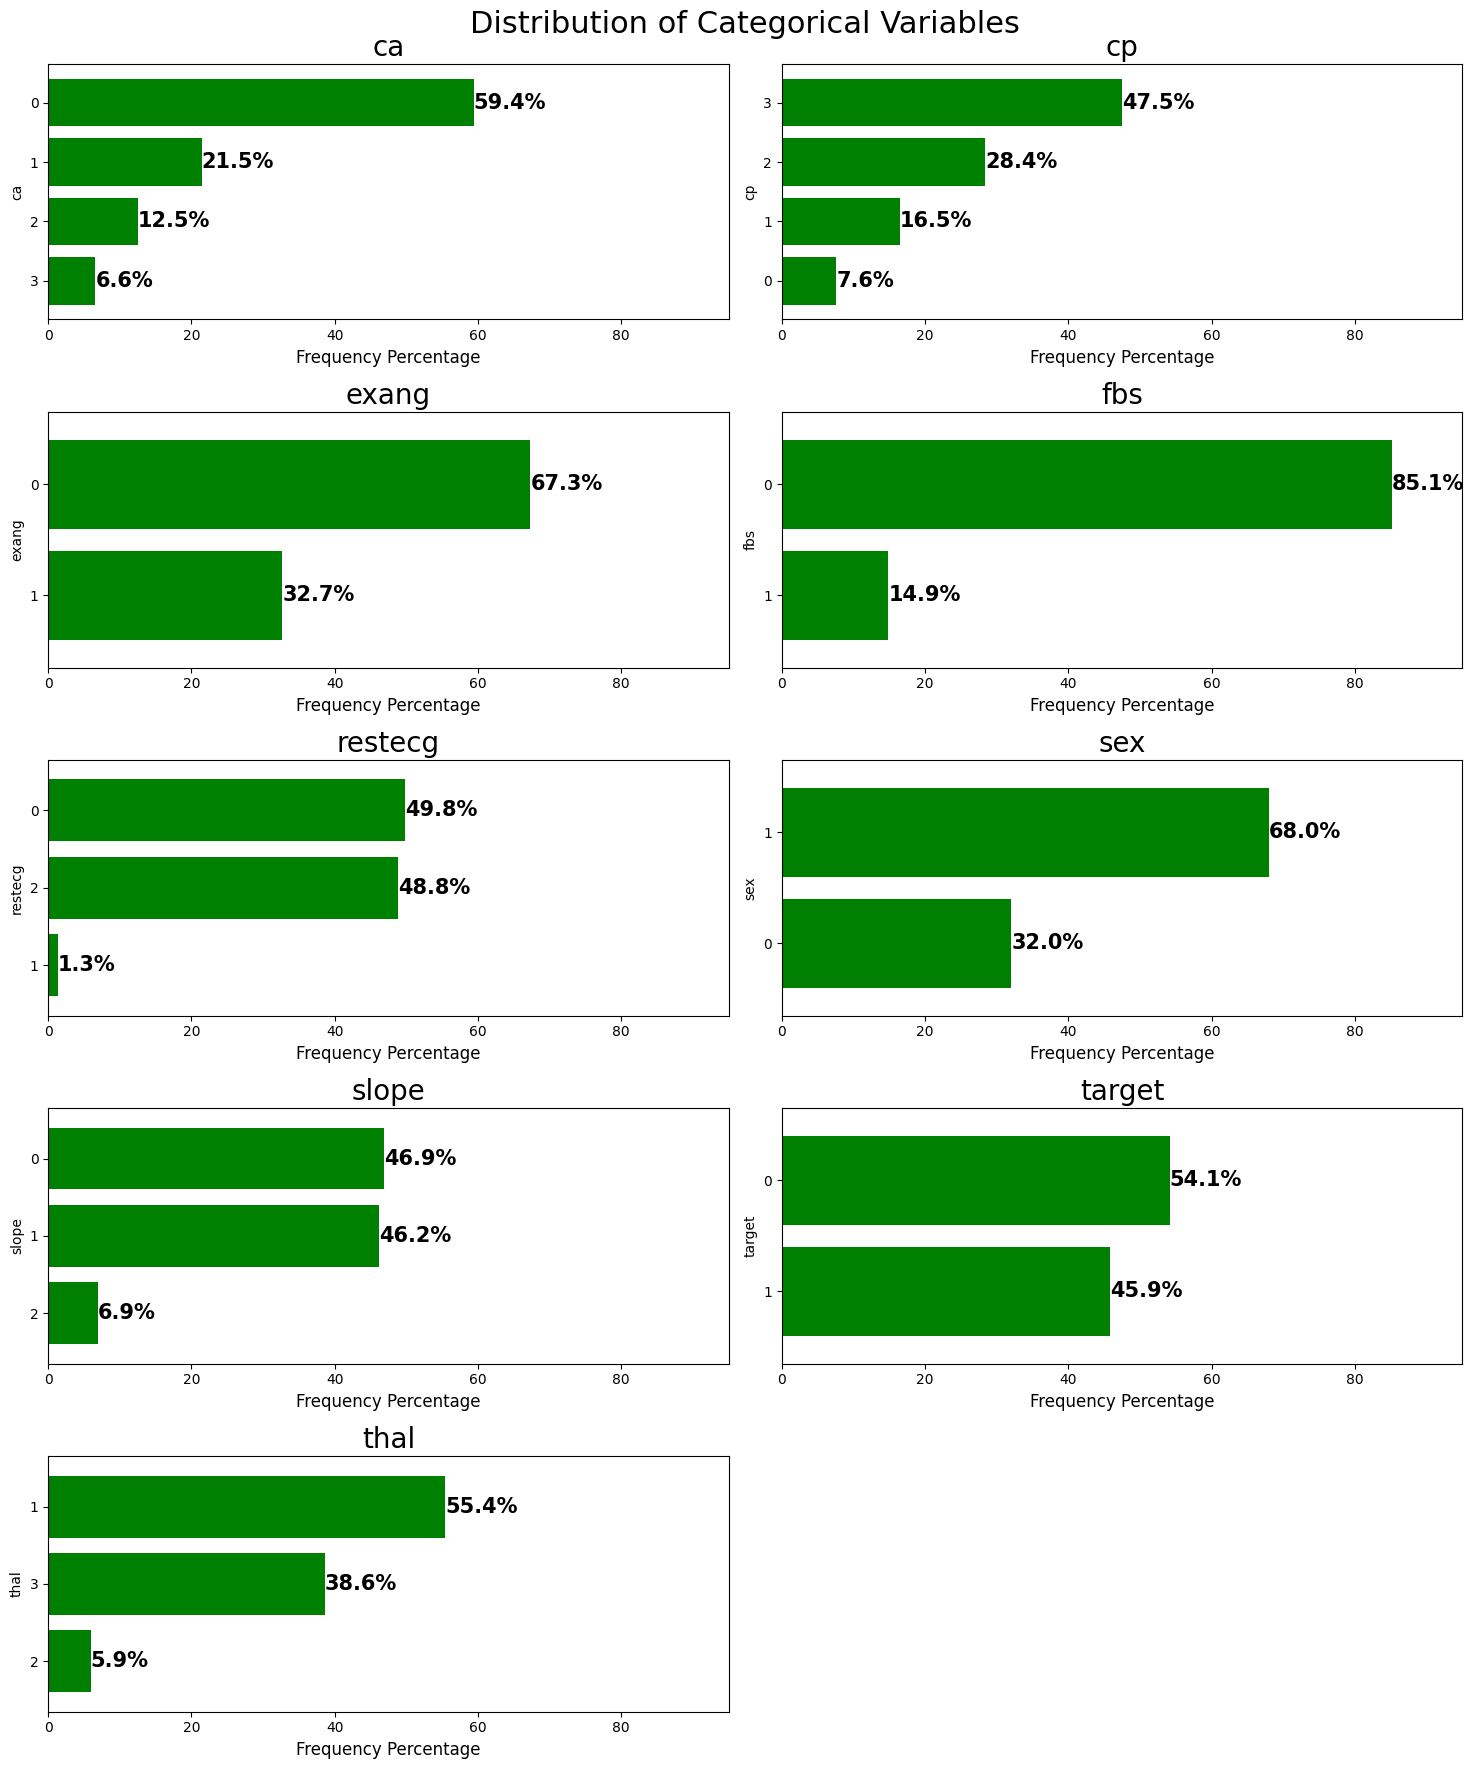

In [122]:
categorical_features = final.columns.difference(num_continous_features)
final_categorical = final[categorical_features]
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2

    # Calculate frequency percentages
    value_counts = final[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='green')

    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')

    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

Bivariate Analysis

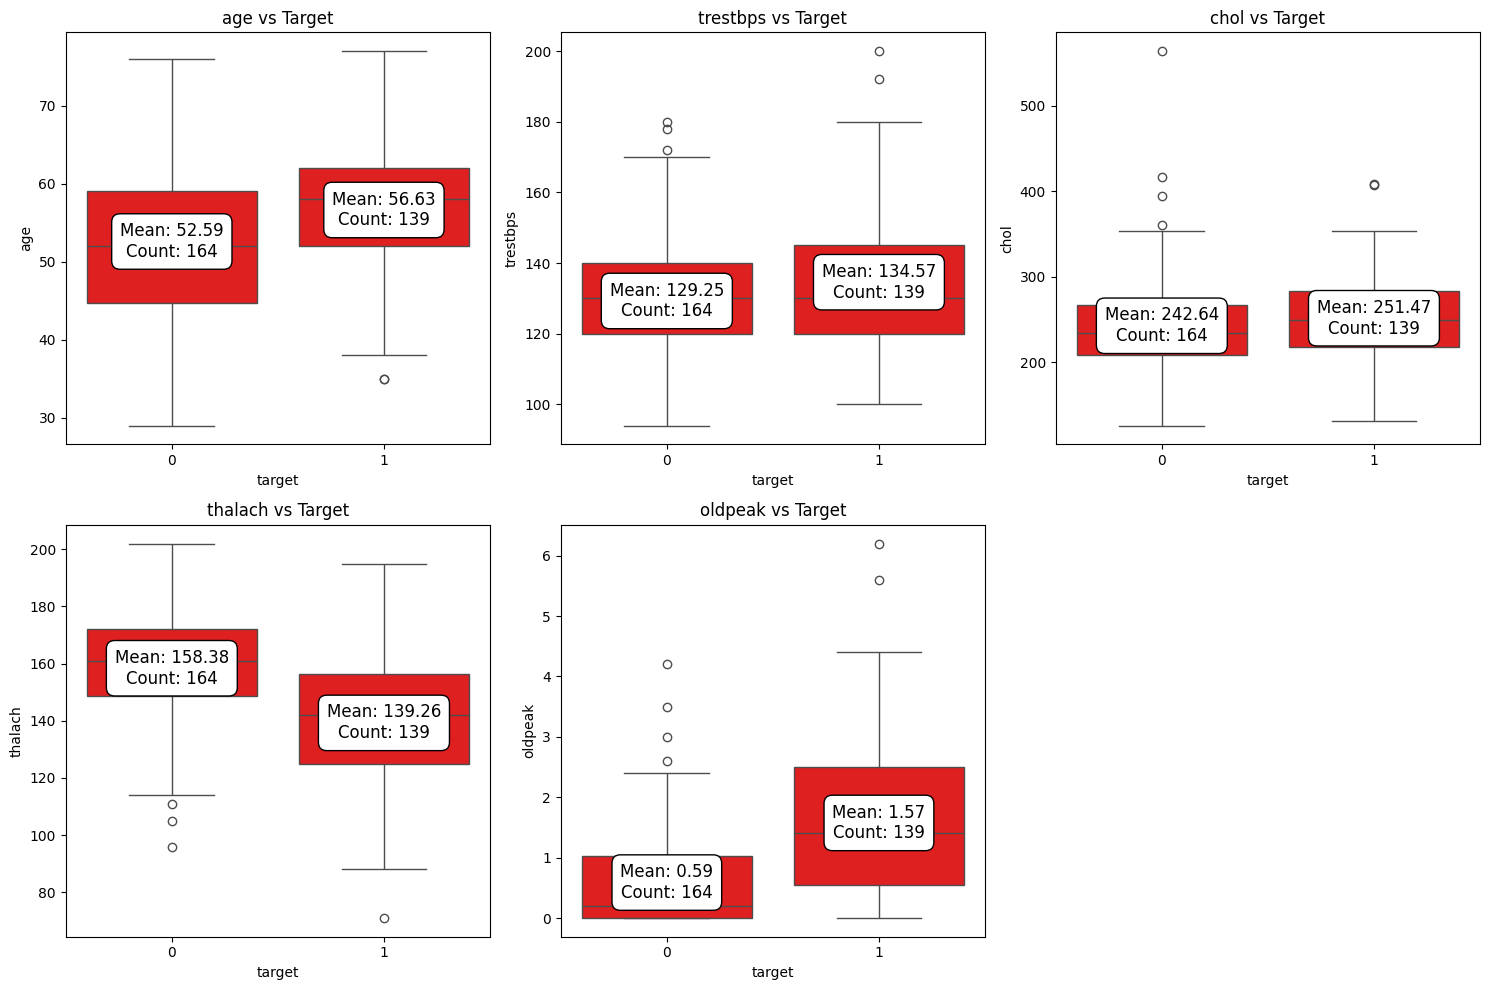

In [123]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_continous_features):
    plt.subplot(2, 3, i + 1)

    # Create the boxplot
    ax = sns.boxplot(x='target', y=feature, data=final,color='red')
    plt.title(f'{feature} vs Target')

    # Calculate mean and count for each 'target' group
    target_groups = final.groupby('target')[feature]
    for target_value, group in target_groups:
        mean_val = group.mean()
        count_val = group.count()

        # Add annotations for mean and count on the boxplot
        ax.annotate(f'Mean: {mean_val:.2f}\nCount: {count_val}',
                    xy=(target_value, mean_val),
                    xycoords='data',
                    ha='center',
                    va='center',
                    fontsize=12,
                    color='black',
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

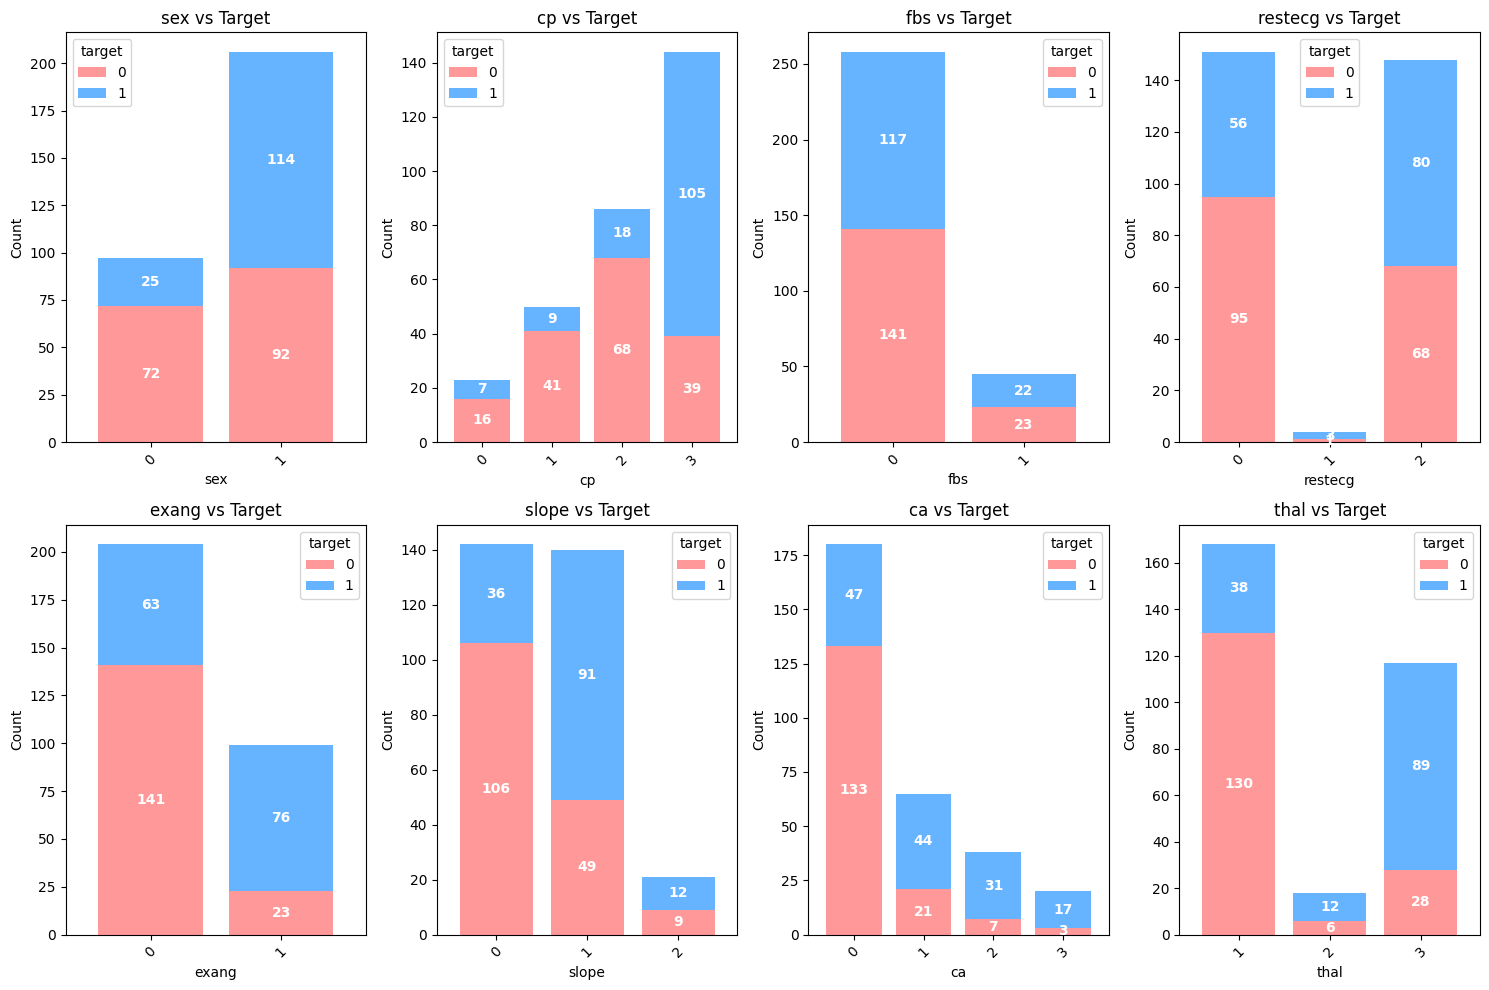

In [124]:
# List of categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Set up the figure size
plt.figure(figsize=(15, 10))

# Loop through each categorical feature
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 4, i + 1)

    # Create a contingency table for counts
    crosstab = pd.crosstab(final[feature], final['target'])

    # Create stacked bar plot using pd.crosstab
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#ff9999','#66b3ff'], width=0.8)

    # Set plot title and labels
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    # Add counts to the bars
    for p in plt.gca().patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x() + width / 2
        y = p.get_y() + height / 2

        # Annotate the count on the bar
        plt.text(x, y, f'{int(height)}', ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-125-88172cb80a50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  cx=sns.countplot(data=final, x='target', palette=colors)


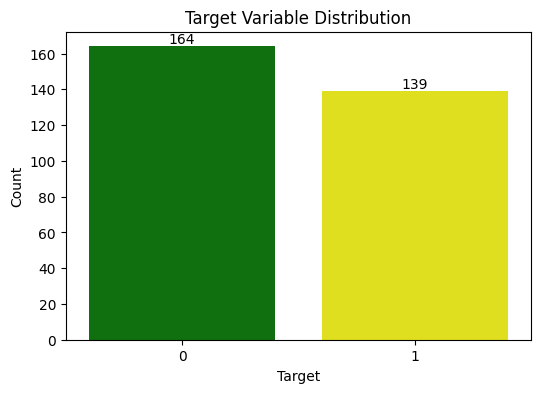

In [125]:
plt.figure(figsize=(6, 4))
colors=["green","yellow"]
cx=sns.countplot(data=final, x='target', palette=colors)

for bar in cx.patches:
    cx.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center',
            va='bottom')

plt.title("Target Variable Distribution")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


Axes(0.125,0.77;0.775x0.11)
Axes(0.125,0.605;0.775x0.11)
Axes(0.125,0.44;0.775x0.11)
Axes(0.125,0.275;0.775x0.11)
Axes(0.125,0.11;0.775x0.11)


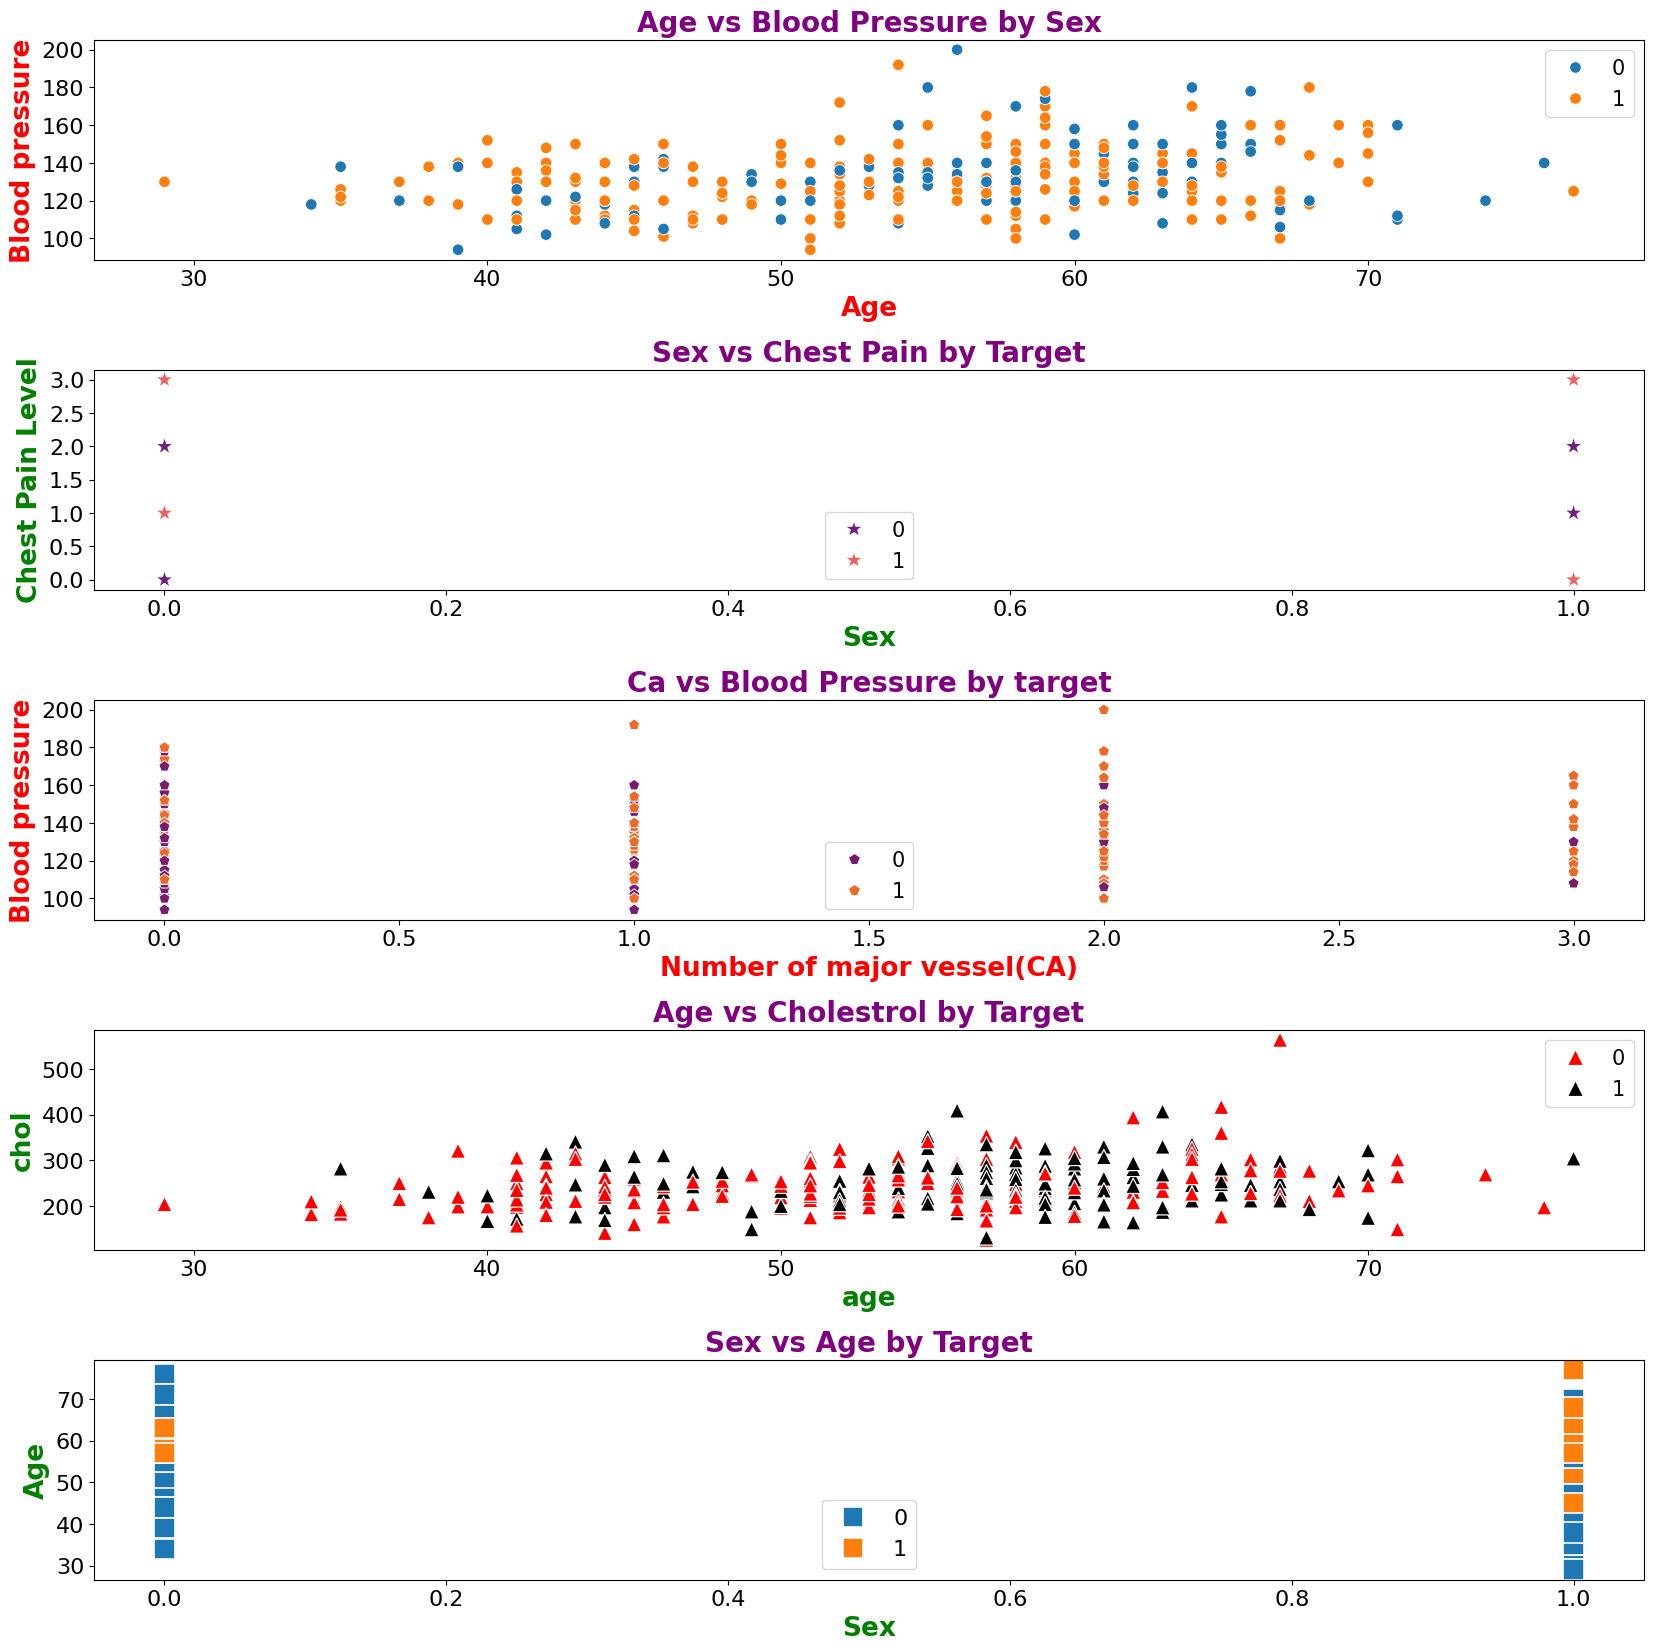

In [126]:
#For creating a figure with specified size
plt.figure(figsize=(20,20))

# Adjusting the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase the vertical space between subplots

#Configuration of subplots
plt.subplot(5,1,1)

#plotting scatterplot based on stress level and BMI category
pic1=sns.scatterplot(x='age',y='trestbps',data =final,hue='sex',marker="o",s=70)
plt.title('Age vs Blood Pressure by Sex', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("Age",fontsize=19,fontweight="bold",color="red")
plt.ylabel("Blood pressure",fontsize=19,fontweight="bold",color="red")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Configuration for second subplots
plt.subplot(5,1,2)

#plotting scatterplot based on Physical Activity level and BMI category
pic2=sns.scatterplot(x='sex',y='cp',data =final,hue='target',marker="*",s=220,palette='magma')
plt.title('Sex vs Chest Pain by Target', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("Sex",fontsize=19,fontweight="bold",color="green")
plt.ylabel("Chest Pain Level",fontsize=19,fontweight="bold",color="green")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#Configuration for Third subplots
plt.subplot(5,1,3)

#plotting scatterplot based on Quality of sleep and Occupation
pic3=sns.scatterplot(x='ca',y='trestbps',data =final,hue='target',marker="p",s=70,palette='inferno')
plt.title('Ca vs Blood Pressure by target', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("Number of major vessel(CA)",fontsize=19,fontweight="bold",color="red")
plt.ylabel("Blood pressure",fontsize=19,fontweight="bold",color="red")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Configuration for fourth subplots
plt.subplot(5,1,4)

custom_palette = {0: 'red', 1: 'black'}
#plotting scatterplot based on stress level and Occupation
pic4=sns.scatterplot(x='age',y='chol',data =final,hue='target',marker="^",s=120 ,palette=custom_palette)
plt.title('Age vs Cholestrol by Target', fontsize=20, fontweight='bold', color='purple')
#Adding Legend
plt.legend(fontsize=15)
#Set the X,y axis labels
plt.xlabel("age",fontsize=19,fontweight="bold",color="green")
plt.ylabel("chol",fontsize=19,fontweight="bold",color="green")

#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Configuration for fourth subplots
plt.subplot(5,1,5)

#plotting scatterplot based on Physical Activity level and BMI category
pic5=sns.scatterplot(x='sex',y='age',data =final,hue='target',marker="s",s=220,color='red')

#Adding Legend
plt.legend(fontsize=15)

#Set the X,y axis labels
plt.xlabel("Sex",fontsize=19,fontweight="bold",color="green")
plt.ylabel("Age",fontsize=19,fontweight="bold",color="green")
plt.title('Sex vs Age by Target', fontsize=20, fontweight='bold', color='purple')
#Set the fontsize for the X,Y tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#Adding legend
plt.legend(fontsize=16)
print(pic1)
print(pic2)
print(pic3)
print(pic4)
print(pic5)



In [127]:
def classify_disease_type(row):


    if(row['oldpeak']>2.0)and(row['ca']>=0)and(row['chol']>200)and(row['thal'] in [2,3]):
       return 'Myocardial Infarction'

    elif (row['ca'] >0) and (row['chol']>200) and (row['trestbps']>120)and (row['thal'] in [2,3]):
        return 'Coronary Artery Disease'

    # Angina
    elif (row['exang'] == 1) and (row['cp'] in [1,2,3]) and (row['slope'] in [1,2])and (row['target']==1):
        return 'Angina'

    # Arrhythmia
    elif (row['restecg'] > 1) and (row['thalach'] <100) and (row['oldpeak']>2.0) and (row['exang']==1):
        return 'Arrhythmia'

    # Normal (No heart disease)
    elif row['target'] == 0:
        return 'Normal'


    # Other/Unspecified Heart Disease
    else:
        return 'Other Heart Disease'

# Add the new column with disease type
final['disease_type'] = final.apply(classify_disease_type, axis=1)

# Prepare data for machine learning prediction
le = LabelEncoder()
final['disease_encoded'] = le.fit_transform(final['disease_type'])

# Features and target
X = final.drop(['target', 'disease_type', 'disease_encoded'], axis=1)
y = final['disease_encoded']

# Train a model to predict disease type
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Add predicted disease type as a new column
final['predicted_disease'] = le.inverse_transform(model.predict(X))

# Display the enhanced dataframe
print(final[['age', 'trestbps', 'chol', 'restecg','exang','oldpeak','target', 'predicted_disease']].head(100))



    age  trestbps  chol restecg exang  oldpeak target        predicted_disease
0    63       145   233       2     0      2.3      0    Myocardial Infarction
1    67       160   286       2     1      1.5      1                   Angina
2    67       120   229       2     1      2.6      1    Myocardial Infarction
3    37       130   250       0     0      3.5      0                   Normal
4    41       130   204       2     0      1.4      0                   Normal
..  ...       ...   ...     ...   ...      ...    ...                      ...
95   52       128   255       0     1      0.0      1  Coronary Artery Disease
96   59       110   239       2     1      1.2      1                   Angina
97   60       150   258       2     0      2.6      1    Myocardial Infarction
98   52       134   201       0     0      0.8      0                   Normal
99   48       122   222       2     0      0.0      0                   Normal

[100 rows x 8 columns]


In [128]:
# Filter out rows where 'predicted_disease' is 'Normal'
final = final[final['predicted_disease'] != 'Normal']

# Display the filtered DataFrame
print(final[['age', 'trestbps', 'chol', 'restecg', 'exang', 'oldpeak', 'target', 'predicted_disease']].head(100))



     age  trestbps  chol restecg exang  oldpeak target  \
0     63       145   233       2     0      2.3      0   
1     67       160   286       2     1      1.5      1   
2     67       120   229       2     1      2.6      1   
6     62       140   268       2     0      3.6      1   
8     63       130   254       2     0      1.4      1   
..   ...       ...   ...     ...   ...      ...    ...   
206   58       128   259       2     1      3.0      1   
207   50       144   200       2     1      0.9      1   
209   62       150   244       0     1      1.4      1   
211   38       120   231       0     1      3.8      1   
213   66       178   228       0     1      1.0      1   

           predicted_disease  
0      Myocardial Infarction  
1                     Angina  
2      Myocardial Infarction  
6        Other Heart Disease  
8    Coronary Artery Disease  
..                       ...  
206    Myocardial Infarction  
207                   Angina  
209                   An

In [129]:
# Assuming your DataFrame is named 'final'
class_counts = final['predicted_disease'].value_counts()

# Display the counts of each class
print(class_counts)


predicted_disease
Other Heart Disease        48
Coronary Artery Disease    34
Angina                     32
Myocardial Infarction      30
Name: count, dtype: int64


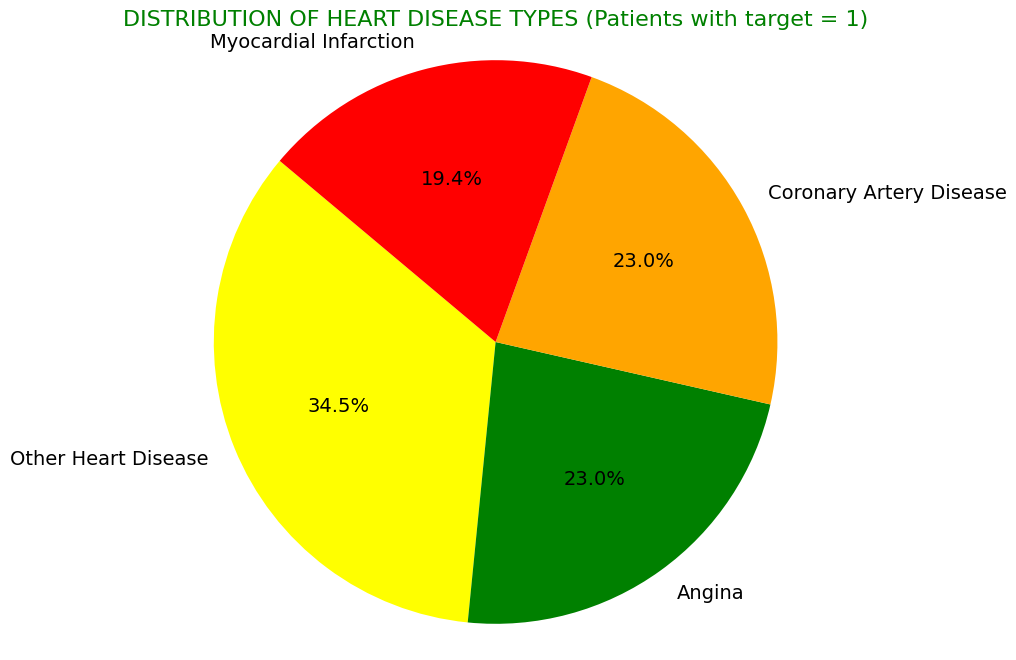

In [130]:
disease_patien = final[final['target'] == 1]

# Count different disease types
disease_counts = disease_patien['predicted_disease'].value_counts()

disease_names = disease_counts.index.tolist()
disease_counts = disease_counts.values.tolist()
# Plot pie chart
# To create a figure  with specified size
plt.figure(figsize=(8, 8))
#colors =plt.cm.Pastel1.colors  # Nice soft color palette
custom_palette=["yellow","green","orange","red","grey"]
plt.pie(disease_counts, labels=disease_names, autopct='%1.1f%%', startangle=140,textprops={'fontsize': 14}, colors=custom_palette)
plt.title('DISTRIBUTION OF HEART DISEASE TYPES (Patients with target = 1)',color="Green", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()



In [131]:
# Set random seed
np.random.seed(120)

label_encoder = LabelEncoder()
final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])

# Features (X) and target variable (y)
X = final.drop(columns=['target', 'predicted_disease'])  # Exclude 'predicted_disease' from features
y = final['predicted_disease']

# Encode any categorical columns in X
for column in X.columns:
    if X[column].dtype == 'object':  # Check if column contains strings
        X[column] = label_encoder.fit_transform(X[column])

# Add noise to the features (optional, if you want to maintain the noise)
noise = np.random.normal(0, 0.5, X.shape)  # Generate random noise
X = X + noise  # Add noise to the features

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale features

# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weight_dict = dict(zip(np.unique(y), class_weights))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model with class weights and more iterations
logreg = LogisticRegression(max_iter=500, class_weight=class_weight_dict, solver='lbfgs')
logreg.fit(X_train, y_train)  # Train the model
logreg_pred = logreg.predict(X_test)  # Make predictions

# Evaluate the model
logreg_acc = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_acc)

# Get the list of all classes from the target variable
all_classes = label_encoder.classes_

# Print classification report for all classes
print("Classification Report for All Classes:")
print(classification_report(y_test, logreg_pred, labels=range(len(all_classes)), target_names=[str(cls) for cls in all_classes]))



Logistic Regression Accuracy: 0.896551724137931
Classification Report for All Classes:
                         precision    recall  f1-score   support

                 Angina       1.00      0.89      0.94         9
Coronary Artery Disease       0.80      0.80      0.80         5
  Myocardial Infarction       0.86      0.86      0.86         7
    Other Heart Disease       0.89      1.00      0.94         8

               accuracy                           0.90        29
              macro avg       0.89      0.89      0.88        29
           weighted avg       0.90      0.90      0.90        29



<ipython-input-131-6a4bd233e063>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])


In [132]:
# Set random seed
np.random.seed(7)

# Encode target variable 'predicted_disease' into numeric values
label_encoder = LabelEncoder()
final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])

# Features (X) and target variable (y)
X = final.drop(columns=['target', 'predicted_disease'])  # Exclude 'predicted_disease' from features
y = final['predicted_disease']

for column in X.columns:
    if X[column].dtype == 'object':  # Check if column contains strings
        X[column] = label_encoder.fit_transform(X[column])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different values of k
knn.fit(X_train, y_train)  # Train the model
knn_pred = knn.predict(X_test)  # Make predictions

# Evaluate the model
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_acc)
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.41379310344827586
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.25      0.40      0.31         5
           2       0.25      0.14      0.18         7
           3       0.44      0.50      0.47         8

    accuracy                           0.41        29
   macro avg       0.39      0.40      0.39        29
weighted avg       0.42      0.41      0.41        29



<ipython-input-132-27c8580650b8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])


In [133]:

# Encode target variable 'predicted_disease' into numeric values
# Set random seed
np.random.seed(7)
label_encoder = LabelEncoder()
final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])

# Check for categorical columns in the features (X)
# If there are any columns with strings, we need to encode them

# Features (X) and target variable (y)
X = final.drop(columns=['target', 'predicted_disease'])  # Exclude 'predicted_disease' from features
y = final['predicted_disease']

# Encode any categorical columns in X
for column in X.columns:
    if X[column].dtype == 'object':  # Check if column contains strings
        X[column] = label_encoder.fit_transform(X[column])

# Add noise to the features to reduce accuracy (this will intentionally degrade model performance)

noise = np.random.normal(0, 1, X.shape)  # Adding Gaussian noise
X_noisy = X + noise  # Adding noise to the features

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)

# Naive Bayes Model
nb = GaussianNB()  # Using Gaussian Naive Bayes for continuous data
nb.fit(X_train, y_train)  # Train the model
nb_pred = nb.predict(X_test)  # Make predictions

# Evaluate the model
nb_acc = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy (Reduced):", nb_acc)
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy (Reduced): 0.6551724137931034
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.50      0.60      0.55         5
           2       0.50      0.43      0.46         7
           3       0.62      0.62      0.62         8

    accuracy                           0.66        29
   macro avg       0.63      0.64      0.63        29
weighted avg       0.66      0.66      0.65        29



<ipython-input-133-b4c813f6de30>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])


In [134]:

# Features (X) and target variable (y)
X = final.drop(columns=['target', 'predicted_disease'])  # Exclude 'predicted_disease' from features
y = final['predicted_disease']

# Encode any categorical columns in X
for column in X.columns:
    if X[column].dtype == 'object':  # Check if column contains strings
        X[column] = label_encoder.fit_transform(X[column])

# Add random noise to the features
np.random.seed(145)
noise = np.random.normal(0, 0.5, X.shape)  # Increase the noise level (standard deviation = 0.5)
X_noisy = X + noise  # Adding more noise to the features

# use a linear kernel to make the model simpler (you could also experiment with other kernels)
svm = SVC(kernel='linear', C=0.01, gamma='scale', random_state=42)  # Reduced regularization (C=0.01)
-
# Only use 50% of the original data for training, forcing the model to underperform
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)  # Use only half for training

# Train the model
svm.fit(X_train, y_train)

# Make predictions
svm_pred = svm.predict(X_test)

# Evaluate the model
svm_acc = accuracy_score(y_test, svm_pred)
print("SVM Accuracy on Test Set (Decreased):", svm_acc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, svm_pred))


SVM Accuracy on Test Set (Decreased): 0.6896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.43      0.60      0.50         5
           2       0.67      0.29      0.40         7
           3       0.80      1.00      0.89         8

    accuracy                           0.69        29
   macro avg       0.67      0.67      0.64        29
weighted avg       0.70      0.69      0.67        29



In [135]:

np.random.seed(22)
# Encode target variable 'predicted_disease' into numeric values
label_encoder = LabelEncoder()
final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])

# Features (X) and target variable (y)
X = final.drop(columns=['target', 'predicted_disease'])  # Exclude 'predicted_disease' from features
y = final['predicted_disease']

# Encode any categorical columns in X
for column in X.columns:
    if X[column].dtype == 'object':  # Check if column contains strings
        X[column] = label_encoder.fit_transform(X[column])

# Add random noise to the features (by adding more significant random values)
np.random.seed(42)
noise = np.random.normal(0, 0.5, X.shape)  # Increase the noise level (standard deviation = 0.5)
X_noisy = X + noise  # Adding more noise to the features

# --- Limit Model Complexity ---
# Reduce the number of trees and make trees shallower to underfit
rf = RandomForestClassifier(
    n_estimators=5,  # Very few trees
    max_depth=2,  # Very shallow trees
    min_samples_split=10,  # Require a larger number of samples to split nodes
    min_samples_leaf=5,  # Require a larger number of samples in leaf nodes
    random_state=42
)

# --- Use a Smaller Portion of the Data ---
# Only use 50% of the original data for training, forcing the model to underperform
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.2, random_state=42)
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
rf_pred = rf.predict(X_test)

# Evaluate the model
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy on Test Set:", rf_acc)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


<ipython-input-135-be5cb4d4a685>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['predicted_disease'] = label_encoder.fit_transform(final['predicted_disease'])


Random Forest Accuracy on Test Set: 0.8275862068965517

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.60      0.60      0.60         5
           2       0.75      0.86      0.80         7
           3       0.89      1.00      0.94         8

    accuracy                           0.83        29
   macro avg       0.81      0.81      0.80        29
weighted avg       0.84      0.83      0.83        29



In [136]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Creating a dictionary to store model results
model_results = {
    "Model": [],
    "Precision (Class 0)": [],
    "Precision (Class 1)": [],
    "Precision (Class 2)": [],
    "Precision (Class 3)": [],
    "Recall (Class 0)": [],
    "Recall (Class 1)": [],
    "Recall (Class 2)": [],
    "Recall (Class 3)": [],
    "F1-Score (Class 0)": [],
    "F1-Score (Class 1)": [],
    "F1-Score (Class 2)": [],
    "F1-Score (Class 3)": [],
    "Macro Avg Precision": [],
    "Macro Avg Recall": [],
    "Macro Avg F1-Score": [],
    "Accuracy": [],
}

# Function to extract and store metrics
def store_metrics(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = accuracy_score(y_true, y_pred)

    model_results["Model"].append(model_name)
    model_results["Precision (Class 0)"].append(report['0']['precision'])
    model_results["Precision (Class 1)"].append(report['1']['precision'])
    model_results["Precision (Class 2)"].append(report['2']['precision'])
    model_results["Precision (Class 3)"].append(report['3']['precision'])

    model_results["Recall (Class 0)"].append(report['0']['recall'])
    model_results["Recall (Class 1)"].append(report['1']['recall'])
    model_results["Recall (Class 2)"].append(report['2']['recall'])
    model_results["Recall (Class 3)"].append(report['3']['recall'])

    model_results["F1-Score (Class 0)"].append(report['0']['f1-score'])
    model_results["F1-Score (Class 1)"].append(report['1']['f1-score'])
    model_results["F1-Score (Class 2)"].append(report['2']['f1-score'])
    model_results["F1-Score (Class 3)"].append(report['3']['f1-score'])

    model_results["Macro Avg Precision"].append(report['macro avg']['precision'])
    model_results["Macro Avg Recall"].append(report['macro avg']['recall'])
    model_results["Macro Avg F1-Score"].append(report['macro avg']['f1-score'])
    model_results["Accuracy"].append(accuracy)

# Example: Store results from Logistic Regression (replace with actual predictions from your models)
store_metrics("Logistic Regression", y_test, logreg_pred)

# Example: Store results from K-Nearest Neighbors (replace with actual predictions from your models)
store_metrics("KNN", y_test, knn_pred)

# Example: Store results from Naive Bayes (replace with actual predictions from your models)
store_metrics("Naive Bayes", y_test, nb_pred)

# Example: Store results from Support Vector Machine (replace with actual predictions from your models)
store_metrics("SVM", y_test, svm_pred)

# Example: Store results from Random Forest (replace with actual predictions from your models)
store_metrics("Random Forest", y_test, rf_pred)

# Convert results to DataFrame
results_final = pd.DataFrame(model_results)

# Display the results
#print(results_final)
print(tabulate(results_final, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤═══════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════════════╤══════════════════════╤══════════════════════╤══════════════════════╤═══════════════════════╤════════════════════╤══════════════════════╤════════════╕
│ Model               │   Precision (Class 0) │   Precision (Class 1) │   Precision (Class 2) │   Precision (Class 3) │   Recall (Class 0) │   Recall (Class 1) │   Recall (Class 2) │   Recall (Class 3) │   F1-Score (Class 0) │   F1-Score (Class 1) │   F1-Score (Class 2) │   F1-Score (Class 3) │   Macro Avg Precision │   Macro Avg Recall │   Macro Avg F1-Score │   Accuracy │
╞═════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╪═══════════════════════╪════════════════════╪════════════════════╪════════════════════╪════════════════════╪══════════════════════╪════════════════════

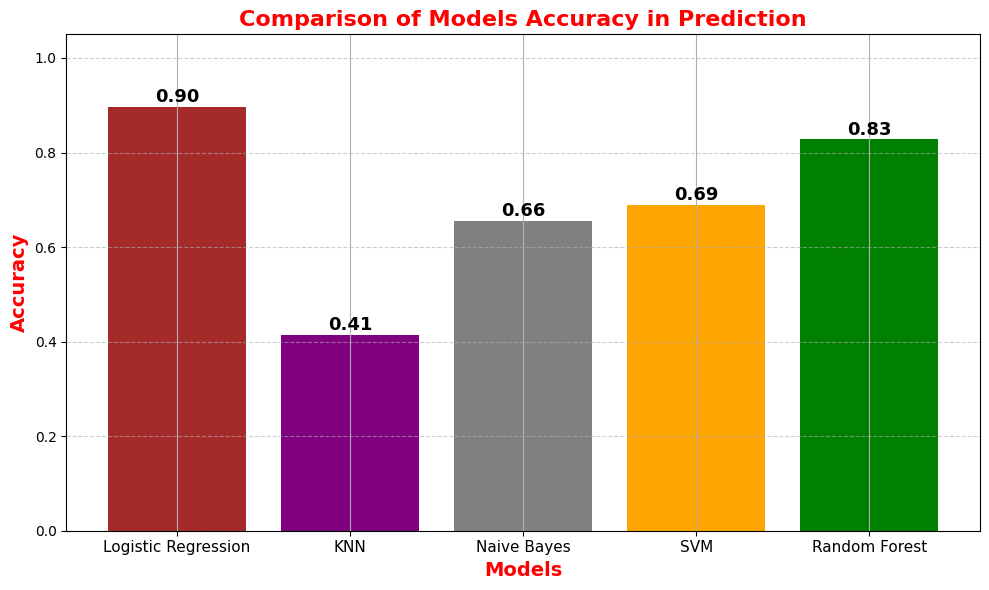

In [137]:

plt.figure(figsize=(10, 6))
custom_colors=["brown","purple","grey","orange","green"]
bars = plt.bar(results_final['Model'], results_final['Accuracy'],color=custom_colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=13,fontweight="bold")

# Set title and labels
plt.title("Comparison of Models Accuracy in Prediction",color="red",fontsize=16,fontweight="bold")
plt.ylabel("Accuracy",fontsize=14, fontweight='bold',color="red",)
plt.xlabel("Models",fontsize=14, fontweight='bold',color="red",)
plt.ylim(0, 1.05)
plt.grid(True)\
# Customize X-axis labels (model names)
plt.xticks(fontsize=11)#, fontweight='bold')

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()






<ipython-input-138-fb03a6c9006a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['disease_encoded'] = le.fit_transform(final['predicted_disease'])  # or 'disease_type'


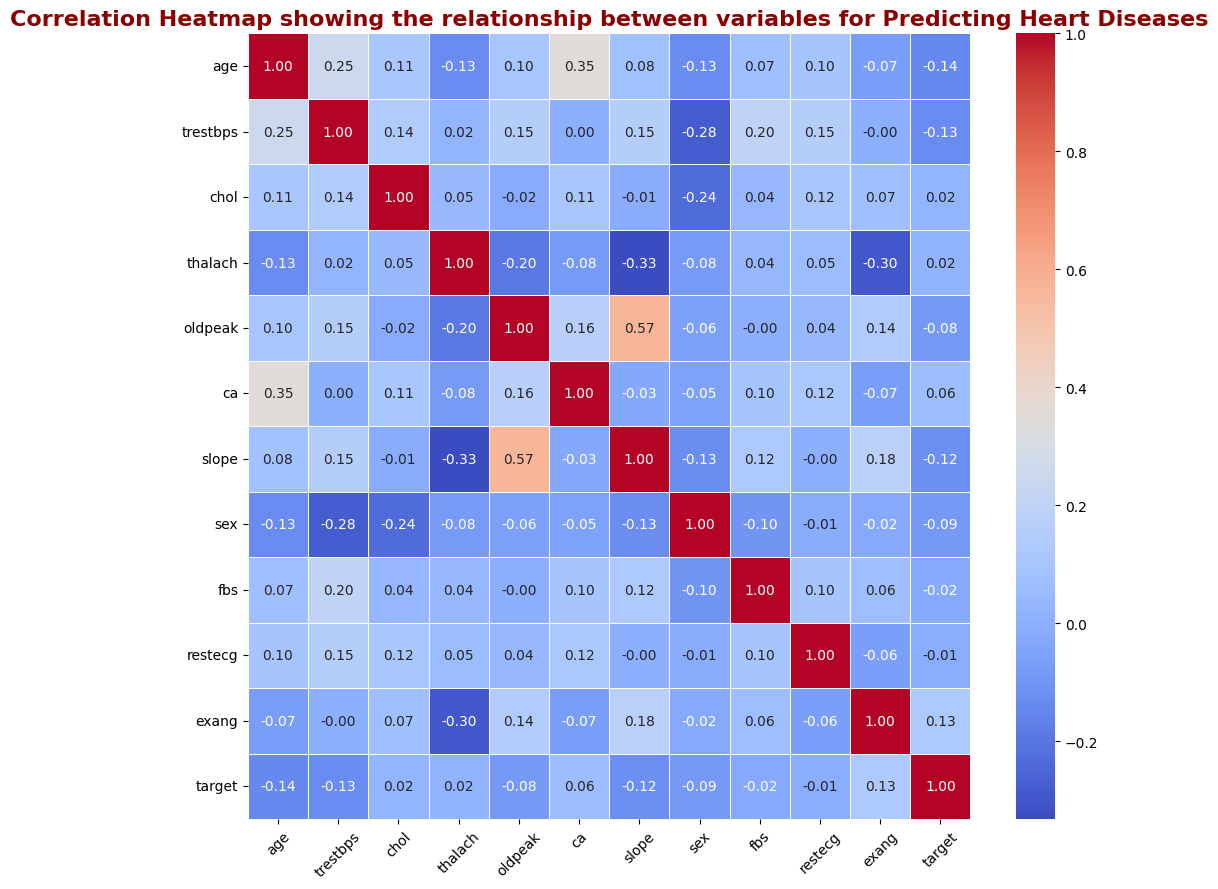

In [138]:
# 1. Encode disease types (e.g., 'predicted_disease' contains 'CAD', 'Angina', etc.)
le = LabelEncoder()
final['disease_encoded'] = le.fit_transform(final['predicted_disease'])  # or 'disease_type'

# 2. Select relevant numerical features that can help in disease prediction
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'slope', 'sex', 'fbs', 'restecg', 'exang', 'target']

# 3. Compute the correlation matrix
correlation_matrix = final[numerical_cols].corr()

# 4. Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap showing the relationship between variables for Predicting Heart Diseases', fontsize=16, fontweight='bold', color='darkred')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
